In [5]:
import os
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.utils import np_utils

Using TensorFlow backend.


In [11]:
#input data

X = []


for i in range(-20, 20):
    for j in range(-20, 20):
        X.append((0.1*i, 0.1*j))
        
X = np.array(X)

Y = [
    1 if x ** 2 + y ** 2 <= 1 else 0
    for [x, y] in X
]

In [12]:
l0 = Input(shape=(2,))
l1 = Dense(4, activation='sigmoid', use_bias=True)(l0)
l2 = Dense(6, activation='sigmoid', use_bias=True)(l1)
l3 = Dense(1, activation='sigmoid', use_bias=False)(l2)

model = Model(input=l0, output=l3)

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


c:\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [13]:
if os.path.isfile("smart_duckling.h5"):
    model.load_weights("smart_duckling.h5")
else:
    model.fit(
        X, Y,
        epochs=15000,
        verbose=False
    )
    model.save("smart_duckling.h5")

Instructions for updating:
Use tf.cast instead.


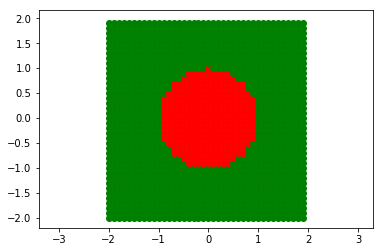

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.r_[-2:2:0.1]

# https://stackoverflow.com/a/11144716/539470 =)
XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c='red' if z[0] >= 0.5 else 'green')

plt.show()

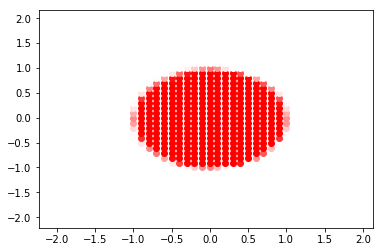

In [15]:
def saturate(v):
    return min(1, max(0, v))

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))])

plt.show()